In [1]:
import krstc_utils as kutils
import pandas as pd
import numpy as np
from pygama.flow import DataGroup
import matplotlib.pyplot as plt
import numpy as np

colors = {
    'bkg':'tab:gray',
    'kry':'tab:blue',
    'decay':'tab:orange',
    'rb83':'tab:green',
    'study':'tab:red'
}

In [3]:
krtscDB = DataGroup('/global/cfs/cdirs/legend/software/KrSTC/data/krstc.json', load=True)
runDB = krtscDB.runDB
lh5_dir = krtscDB.lh5_dir
dsp_list = lh5_dir + krtscDB.fileDB['dsp_path'] + '/' + krtscDB.fileDB['dsp_file']
BEGINNING_CYCLE = 2019

In [6]:
skip_cycle_dict = {
    '77': [3377], # file exists, but no trapEmax
    '92': [3876,3877] # file doesn't exist
}
skip_cycle_dict.__contains__(str(78))

False

# count rates

In [20]:
#runs = np.arange(57,59+1).tolist()
runs = np.arange(57,59+1).tolist()
# delete 77
#runs.remove(77)
params = [['trapEmax','timestamp']]

count_rate_df = pd.DataFrame(columns=['run', 'cycle', 'runtime_s', 'count_rate', 'start_time', 'end_time', 'runtype', 'fileDB_startTime'])

ecal_range = [11, 32]


for run in runs:
    print(run)
    # if run==92:
    #     df, runtype = kutils.load_dsp(run=run, params=params, verbose=False, skip_cycles=[3876,3877])
    # else:
    #     df, runtype = kutils.load_dsp(run=run, params=params, verbose=False)

    skip_cycles = None
    if skip_cycle_dict.__contains__(str(run)):
        skip_cycles = skip_cycle_dict[str(run)]

    df, runtype = kutils.load_dsp(run=run, params=params, verbose=False, skip_cycles=skip_cycles)


    cycles = df.cycle.unique()
    runtimes = df.runtime_s.unique()


    for cycle, runtime in zip(cycles, runtimes):
        dfc = df[df.cycle==cycle]
        start_time = dfc.timestamp.min()
        end_time = dfc.timestamp.max()

        dfc = dfc[(dfc.trapEmax_cal_keV>ecal_range[0]) & (dfc.trapEmax_cal_keV<ecal_range[1])]


        count_rate = len(dfc)/runtime
        count_rate_err = np.sqrt(len(dfc))/runtime

        d = {'run': run, 'cycle': cycle, 'runtime_s': runtime, 'count_rate': count_rate, 'count_rate_err':count_rate_err, 'start_time': start_time, 'end_time': end_time, 'runtype': runtype, 'fileDB_startTime': krtscDB.fileDB.iloc[cycle-BEGINNING_CYCLE]['startTime']}

        count_rate_df = pd.concat([count_rate_df, pd.DataFrame([d])])

# convert fileDB_startTime to datetime
count_rate_df['fileDB_startDate'] = pd.to_datetime(count_rate_df['fileDB_startTime'], unit='s')

# date diff between each row
count_rate_df['date_diff'] = count_rate_df['fileDB_startDate'].diff().dt.seconds

count_rate_df

57
58
59


,run,cycle,runtime_s,count_rate,start_time,end_time,runtype,fileDB_startTime,count_rate_err,fileDB_startDate,date_diff
0,57,3053,678.499414,2.605750,5982593,67849941414,bkg,1.682107e+09,0.061971,2023-04-21 20:01:29,NaN
0,57,3054,1499.377514,2.624422,6947768,149937751358,bkg,1.682108e+09,0.041837,2023-04-21 20:12:50,681.0
0,57,3055,1439.415044,2.591330,8196478,143941504429,bkg,1.682109e+09,0.042430,2023-04-21 20:37:50,1500.0
0,57,3056,1232.624183,2.482508,7345568,123262418276,bkg,1.682112e+09,0.044878,2023-04-21 21:16:26,2316.0
0,58,3057,1498.557612,4.214052,2961685,149855761155,kry,1.682113e+09,0.053029,2023-04-21 21:37:01,1235.0
0,58,3058,1499.156998,3.794799,7112586,149915699763,kry,1.682115e+09,0.050312,2023-04-21 22:02:01,1500.0
0,58,3059,1451.090393,3.818508,3359087,145109039321,kry,1.682116e+09,0.051298,2023-04-21 22:27:02,1501.0
0,58,3060,4.009446,5.487042,8258795,400944646,kry,1.682117e+09,1.169841,2023-04-21 22:51:14,1452.0
0,58,3061,1499.670637,4.013548,2306124,149967063664,kry,1.682118e+09,0.051733,2023-04-21 22:52:25,71.0
0,58,3062,1498.616951,4.163839,7178509,149861695144,kry,1.682119e+09,0.052711,2023-04-21 23:17:25,1500.0


Text(0.5, 1.0, 'count/s, ecal_range: [11, 32]keV \nruns:[57 58 59]')

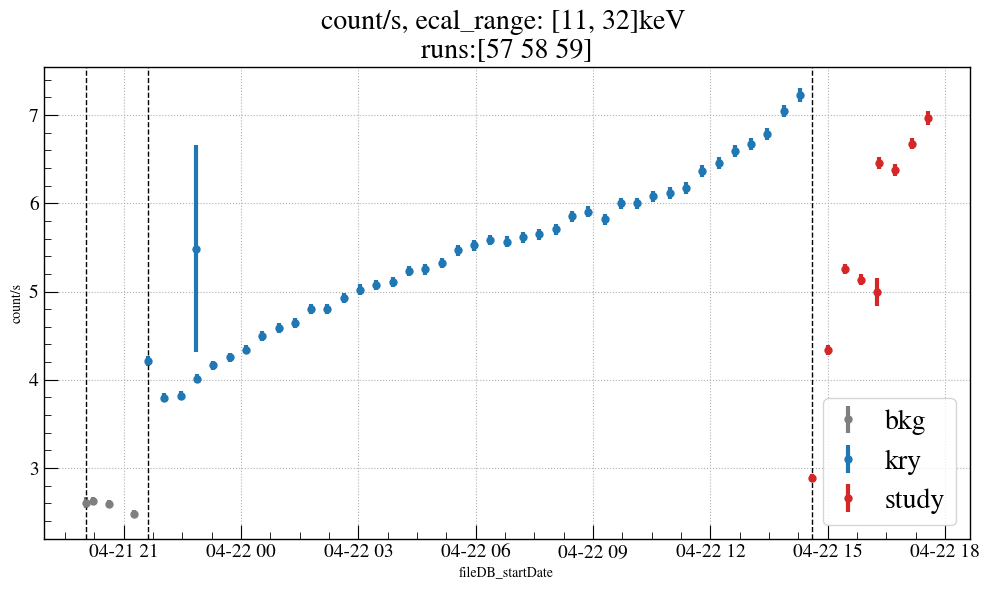

In [21]:
# plot count rate vs fileDB_startDate with each runtype with different color
fig, ax = plt.subplots(figsize=(10,6))
for runtype in count_rate_df.runtype.unique():
    df = count_rate_df[count_rate_df.runtype==runtype]

    ax.errorbar(df.fileDB_startDate, df.count_rate, df.count_rate_err, label=runtype, marker='o', linestyle='none', color=colors[runtype], markersize=5)
    #ax.plot(df.fileDB_startDate, df.count_rate, label=runtype, marker='o', linestyle='none', color=colors[runtype], markersize=5)
    

# plot vertical line at the start of the first cycle of each run
for run in count_rate_df.run.unique():
    df = count_rate_df[count_rate_df.run==run]
    ax.axvline(df.fileDB_startDate.min(), color='k', linestyle='--', lw=1)

ax.set_xlabel('fileDB_startDate')
ax.set_ylabel('count/s')
ax.legend()
plt.title('count/s, ecal_range: ' + str(ecal_range)+ 'keV \nruns:'+str(count_rate_df.run.unique()))
#plt.ylim(0,20)

# baseline

In [22]:
runs = np.arange(57,59+1).tolist()
params = [['trapEmax','timestamp', 'bl']]

dff = pd.DataFrame(columns=['run', 'cycle', 'runtime_s', 'bl','bl_intercept', 'start_time', 'end_time', 'runtype', 'fileDB_startTime'])



for run in runs:
    if run==77:
        df, runtype = kutils.load_dsp(run=run, params=params, verbose=False, skip_cycles=[3377])
    else:
        df, runtype = kutils.load_dsp(run=run, params=params, verbose=False)

    cycles = df.cycle.unique()
    runtimes = df.runtime_s.unique()


    for cycle, runtime in zip(cycles, runtimes):
        dfc = df[df.cycle==cycle]
        start_time = dfc.timestamp.min()
        end_time = dfc.timestamp.max()


        #dfc = dfc[(dfc.trapEmax_cal_keV>5) & (dfc.trapEmax_cal_keV<32)]


        bl = dfc.bl.mean()
        bl_intercept = dfc.bl_intercept.mean()

        d = {'run': run, 'cycle': cycle, 'runtime_s': runtime, 'bl': bl, 'start_time': start_time, 'end_time': end_time, 'runtype': runtype, 'fileDB_startTime': krtscDB.fileDB.iloc[cycle-BEGINNING_CYCLE]['startTime']}

        dff = pd.concat([dff, pd.DataFrame([d])])

# convert fileDB_startTime to datetime
dff['fileDB_startDate'] = pd.to_datetime(dff['fileDB_startTime'], unit='s')

# date diff between each row
dff['date_diff'] = dff['fileDB_startDate'].diff().dt.seconds





dff

,run,cycle,runtime_s,bl,bl_intercept,start_time,end_time,runtype,fileDB_startTime,fileDB_startDate,date_diff
0,57,3053,678.499414,33819.257812,NaN,5982593,67849941414,bkg,1.682107e+09,2023-04-21 20:01:29,NaN
0,57,3054,1499.377514,33817.488281,NaN,6947768,149937751358,bkg,1.682108e+09,2023-04-21 20:12:50,681.0
0,57,3055,1439.415044,33818.914062,NaN,8196478,143941504429,bkg,1.682109e+09,2023-04-21 20:37:50,1500.0
0,57,3056,1232.624183,33819.464844,NaN,7345568,123262418276,bkg,1.682112e+09,2023-04-21 21:16:26,2316.0
0,58,3057,1498.557612,33818.375000,NaN,2961685,149855761155,kry,1.682113e+09,2023-04-21 21:37:01,1235.0
0,58,3058,1499.156998,33817.679688,NaN,7112586,149915699763,kry,1.682115e+09,2023-04-21 22:02:01,1500.0
0,58,3059,1451.090393,33817.515625,NaN,3359087,145109039321,kry,1.682116e+09,2023-04-21 22:27:02,1501.0
0,58,3060,4.009446,33803.511719,NaN,8258795,400944646,kry,1.682117e+09,2023-04-21 22:51:14,1452.0
0,58,3061,1499.670637,33818.789062,NaN,2306124,149967063664,kry,1.682118e+09,2023-04-21 22:52:25,71.0
0,58,3062,1498.616951,33819.906250,NaN,7178509,149861695144,kry,1.682119e+09,2023-04-21 23:17:25,1500.0


(33700.0, 33850.0)

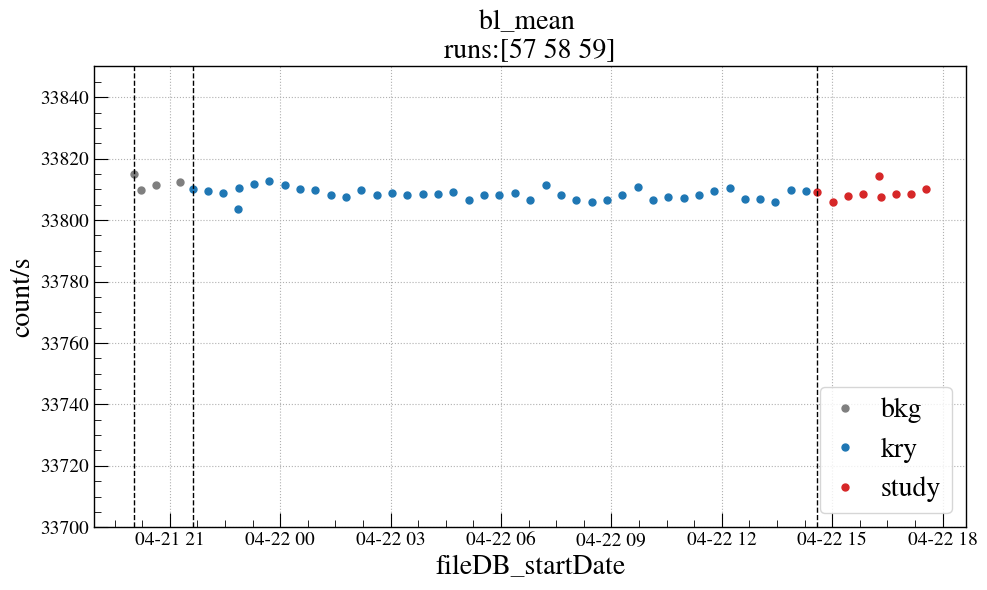

In [69]:
#plot it
# plot count rate vs fileDB_startDate with each runtype with different color
fig, ax = plt.subplots(figsize=(10,6))
for runtype in dff.runtype.unique():
    d = dff[dff.runtype==runtype]
    ax.plot(d.fileDB_startDate, d.bl, label=runtype, marker='o', linestyle='none', color=colors[runtype],markersize=5)

# plot vertical line at the start of the first cycle of each run
for run in dff.run.unique():
    d = dff[dff.run==run]
    ax.axvline(d.fileDB_startDate.min(), color='k', linestyle='--', lw=1)

ax.set_xlabel('fileDB_startDate')
ax.set_ylabel('count/s')
ax.legend()
plt.title('bl_mean \nruns:'+str(dff.run.unique()))
plt.ylim(33700,33850)